# How can I make the best PC game?

## A data science tutorial by Peter Caintic
Spring 2024 Data Science Project

100% of work done by Peter Caintic

## Table of Contents

## 1. Introduction

There are many reasons someone might take interest in the video game industry. Video games are a relatively new art form, one free of conventions that may constrict creativity. The video game industry boomed during the pandemic, with some estimates valueing it over $300 billion in 2021. Games represent extreme technical challenges, and constantly seek to push computer hardware to its limits. 

Regardless of their reasons, though, all those involved in the game industry share a common goal: to make the best video games they can. But how do you make good games? 

In this tutorial, we'll see if analyzing data can give us any insight into how to make the best games you can. We'll examine what types of games review well, and how much a budget affects a game's quality.

Source for game industry value estimate: https://newsroom.accenture.com/news/2021/global-gaming-industry-value-now-exceeds-300-billion-new-accenture-report-finds

# 2. Data Curation

First, let's establish the bounds of this project.

We will be using the dataset at the following link for our analysis: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

This is a dataset from the Steam store, the leading storefront for PC games. As such, our analysis will be limited to PC games (as opposed to games on consoles like a Playstation). 

We will also be using Metacritic scores as our measure of game quality. Metacritic is a review aggregator, taking the average of reviews from several outlets. While not necessarily the most objective measure of quality, it is good enough that game studios sometimes use it as a performance metric, even to the point of using a Metacritic score to determine whether a team gets a bonus (admittedly, a controversial practice).

Metacritic scores also have the added benefit that they are relatively static. Professional reviews for games are usually released within a few weeks of their release date and are not amended. In contrast, user reviews can change over time, which could bias our analysis in favor of older games.

Now that that's out of the way, let's get started! First, let's import some Python libraries that will be used throughout our analysis.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as scst
import matplotlib.pyplot as plt

Now, let's load our dataset.

In [3]:
df = pd.read_csv("games.csv")
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


And let's get some basic information about shape of the dataframe:

In [4]:
print(f"Column names: {list(df.columns)}.")
print(f"Dimensions: {df.shape[0]} rows and {df.shape[1]} columns.")
print("Data types:===============================================" + 
      f"\n{df.dtypes}\n" + 
      "==========================================================")

Column names: ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'].
Dimensions: 85103 rows and 39 columns.
Data types:===============================================
AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count             

## Data cleaning

Let's first remove rows that have invalid Metacritic scores. A quick glance at Metacritic.com reveals that the lowest score on the site is 17, so we can assume that entries with "0" simply do not have a Metacritic score recorded. Let's remove them.

In [5]:
df = df[df["Metacritic score"] != 0]
df.shape

(3912, 39)

We now have much less data, but that is a necessary evil if we want to use Metacritic scores for our analysis.

Our analysis will primarily focus on game content and finances, so let's extract only the columns we'll use:

In [6]:
df = df[["Estimated owners", "Price", "Categories", "Tags", "Metacritic score"]]
df.head()

,Estimated owners,Price,Categories,Tags,Metacritic score
10,20000 - 50000,23.99,"Single-player,Steam Achievements,Steam Trading...","Tactical RPG,Turn-Based Strategy,Wargame,Histo...",62
15,200000 - 500000,9.99,"Single-player,Multi-player,Co-op,Steam Achieve...","Action,Shooter,Sci-fi,Aliens,Third Person,Isom...",64
42,100000 - 200000,19.99,"Single-player,Multi-player,Co-op,Steam Achieve...","Adventure,Action,FPS,Shooter,Multiplayer,First...",53
44,50000 - 100000,3.99,"Single-player,Steam Achievements,Full controll...","RPG,Indie,Card Game,Adventure,Choices Matter,2...",84
66,500000 - 1000000,3.49,Single-player,"Action,Noir,Classic,Third-Person Shooter,Bulle...",89


### Adding and Modifying Features

The Categories and Tags columns have values that are long, comma-separated lists of string values. Currently, they're read as a single long string. For ease of access, let's separate the Categories and Tags columns' values into lists.

In [7]:
def simple_split(string, delim:str):
    if pd.isna(string):
        return pd.NA
    else:
        return string.split(delim)

df["Categories"] = df["Categories"].apply(simple_split, args=(","))
df["Tags"] = df["Tags"].apply(simple_split, args=(","))

Let's also add Single-player and Multi-player columns, which should be "1" if the game has "Single-player" and/or "Multi-player" in its "Categories" entry, respectively. This is similar to a One-Hot Encoding, but note that we'll have to do this somewhat manually, since the entries in "Categories" are lists.

In [8]:
def in_list_elt(x, match=""):
    if np.any(pd.isna(x)):
        return 0
    elif (match in x):
        return 1
    else:
        return 0

df["Single-player"] = df["Categories"].apply(lambda x: in_list_elt(x, match="Single-player"))
df["Multi-player"] = df["Categories"].apply(lambda x: in_list_elt(x, match="Multi-player"))

# 3. Data Exploration and Analysis

## 3A. Metacritic Score Normality

Before starting any analysis, we should check to see if the Metacritic Score data is normally distributed. Let's compute the mean and standard deviation of the distribution, and see if the data follows the 68-95-99 rule.

Mean of Metacritic scores: 72.84151329243353
Standard Deviation of Metacritic scores: 10.565931103659011
Percent within one standard deviation of mean: 0.7188139059304703
Percent within two standard deviations of mean: 0.9552658486707567
Percent within three standard deviations of mean: 0.9882413087934561


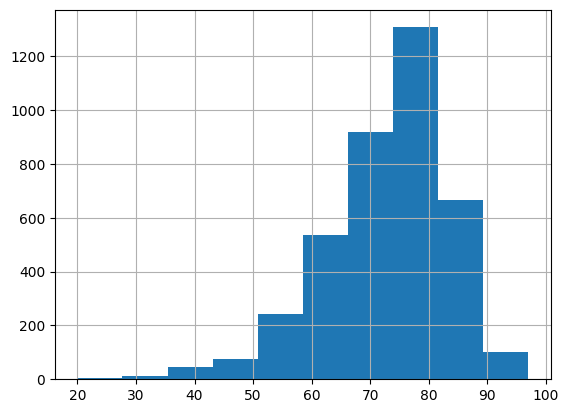

In [9]:
df["Metacritic score"].hist()

# Get mean and standard deviation
ms_mean = df["Metacritic score"].mean()
ms_stdev = df["Metacritic score"].std()
print(f"Mean of Metacritic scores: {ms_mean}")
print(f"Standard Deviation of Metacritic scores: {ms_stdev}")

# 68% rule
perc_1_stdev = len(df[(df["Metacritic score"] < (ms_mean + ms_stdev)) & (df["Metacritic score"] > (ms_mean - ms_stdev))]) / len(df)
print(f"Percent within one standard deviation of mean: {perc_1_stdev}")

# 95% rule
perc_2_stdev = len(df[(df["Metacritic score"] < (ms_mean + (2*ms_stdev))) & (df["Metacritic score"] > (ms_mean - (2*ms_stdev)))]) / len(df)
print(f"Percent within two standard deviations of mean: {perc_2_stdev}")

# 99.7% rule
perc_3_stdev = len(df[(df["Metacritic score"] < (ms_mean + (3*ms_stdev))) & (df["Metacritic score"] > (ms_mean - (3*ms_stdev)))]) / len(df)
print(f"Percent within three standard deviations of mean: {perc_3_stdev}")

As you can see, this is very close to a normal distribution, so it should be safe to assume that Metacritic scores are normally distributed. It's worth noting, though, that it is left-skewed.

## 3B. What should the game be about? Analyzing tags.

If we're going to make a game, what should it be about? 

Steam has a "tag" system for its games, where users can assign tags to games based on various aspects of the game. Let's see if we can find tags that are associated with higher Metacritic scores.

First, we need to reformat our dataset. Since the "Tags" column contains lists of tags, we need to find a way to split these apart. We can use the "explode()" function to modify the dataframe, duplicating each row so that each row contains only 1 tag. We also drop rows that have no tags; these are only 26 out of the 3912 entries.

In [10]:
df_tags = df.explode("Tags")
print(df_tags.shape)
df_tags.dropna(subset = ["Tags"], inplace=True)
print(df_tags.shape)
df_tags.head()

(60546, 7)
(60520, 7)


,Estimated owners,Price,Categories,Tags,Metacritic score,Single-player,Multi-player
10,20000 - 50000,23.99,"[Single-player, Steam Achievements, Steam Trad...",Tactical RPG,62,1,0
10,20000 - 50000,23.99,"[Single-player, Steam Achievements, Steam Trad...",Turn-Based Strategy,62,1,0
10,20000 - 50000,23.99,"[Single-player, Steam Achievements, Steam Trad...",Wargame,62,1,0
10,20000 - 50000,23.99,"[Single-player, Steam Achievements, Steam Trad...",Historical,62,1,0
10,20000 - 50000,23.99,"[Single-player, Steam Achievements, Steam Trad...",Strategy RPG,62,1,0


Now, let's run an ANOVA test to make sure that there is a statistically significant difference in Metacritic score between these groups.

In [11]:
all_tags = list(pd.unique(df_tags["Tags"]))
tag_groups = [list(df_tags["Metacritic score"][df_tags["Tags"] == tag]) for tag in all_tags]
print(f"ANOVA p-value: {scst.f_oneway(*tag_groups).pvalue}")

ANOVA p-value: 1.1510041421264897e-121


The p-value is very low, so there is certainly a difference between tags!

Let's see if we can get the 20 top tags, based on the average Metacritic score of games containing these tags. With this, we can determine what the best subject matter for our game should be!

In [12]:
top_tags = df_tags[["Tags", "Metacritic score"]].groupby(["Tags"]).mean()
top20 = (top_tags.sort_values(by=["Metacritic score"], ascending=False)).head(20)
top20

,Metacritic score
Tags,
Batman,91.000000
Rock Music,87.000000
Well-Written,85.750000
Baseball,85.250000
Electronic Music,82.750000
Masterpiece,82.526316
Addictive,81.072727
Silent Protagonist,80.666667
Archery,80.250000


Wow. Truly, Batman always wins.

![](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExMjJydjlmcWQwODhmcHZrOHduZmxuODQ4bGFqZGh6eXh5ODN5dGI5YyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/n5BQXPVdLi3FB9IaVy/giphy.gif)

So, taking the top 3 tags, a well-written game about Batman with a rock music soundtrack would do extremely well. It certainly sounds interesting!

## 3C. Singleplayer or Multiplayer (or both)?

Making a multiplayer game, or adding multiplayer functionality, drastically increases the complexity of a game's development. As such, it'd be a good idea to see if such functionality had any relationship with how well a game reviews.

Let's make 3 datasets: one for singleplayer-only games, one for multiplayer-only games, and one for games with both singleplayer and multiplayer elements.

In [13]:
sing_df = df[(df["Single-player"] == 1) & (df["Multi-player"] == 0)]
mult_df = df[(df["Multi-player"] == 1) & (df["Single-player"] == 0)]
singmult_df = df[(df["Single-player"] == 1) & (df["Multi-player"] == 1)]

Let's examine the mean scores of these datasets:

Single-player mean score: 72.48389694041867
Multi-player mean score: 73.95833333333333
Both Single-player and Multi-player mean score: 73.46420323325636


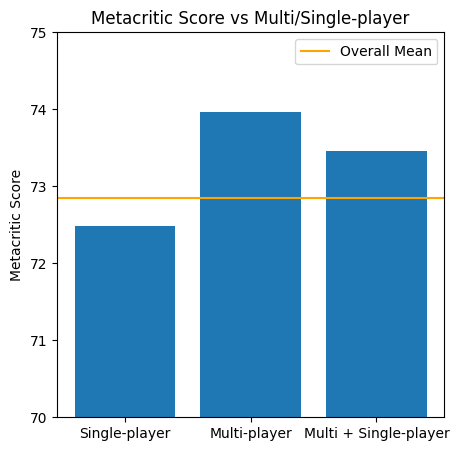

In [14]:
sing_scores = sing_df["Metacritic score"]
mult_scores = mult_df["Metacritic score"]
singmult_scores = singmult_df["Metacritic score"]

print(f"Single-player mean score: {sing_scores.mean()}")
print(f"Multi-player mean score: {mult_scores.mean()}")
print(f"Both Single-player and Multi-player mean score: {singmult_scores.mean()}")

# Plotting means
x_axis = ["Single-player", "Multi-player", "Multi + Single-player"]
y_axis = [sing_scores.mean(), mult_scores.mean(), singmult_scores.mean()]

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.bar(x_axis, y_axis)
axes.axhline(y=df["Metacritic score"].mean(), color='orange', linestyle='-', label="Overall Mean")
axes.set_title('Metacritic Score vs Multi/Single-player')
axes.set_ylim([70, 75])
axes.set_ylabel('Metacritic Score')
axes.legend()

There seems to be a slight difference, giving multiplayer an edge overall. It's hard to tell if it's significant though, so let's run an ANOVA test to see if there's a difference between these three groups. The null hypothesis is that there is no statistically-significant difference between these groups, and the alternative hypothesis is that there is.

In [15]:
sing_scores = sing_df["Metacritic score"]
mult_scores = mult_df["Metacritic score"]
singmult_scores = singmult_df["Metacritic score"]
scst.f_oneway(sing_scores, mult_scores, singmult_scores)

F_onewayResult(statistic=4.366351948711447, pvalue=0.012759607461070336)

Interesting, so some of these groups has a statistically significant difference from the others. Let's run Tukey's HSD test to compare the means and figure out which:

In [16]:
print(scst.tukey_hsd(sing_scores, mult_scores, singmult_scores))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.474     0.293    -3.784     0.835
 (0 - 2)     -0.980     0.018    -1.827    -0.134
 (1 - 0)      1.474     0.293    -0.835     3.784
 (1 - 2)      0.494     0.875    -1.864     2.852
 (2 - 0)      0.980     0.018     0.134     1.827
 (2 - 1)     -0.494     0.875    -2.852     1.864



From the p-value of the (0-2) case, we can see that the difference in mean score between Singleplayer-only games and games with both singleplayer and multiplayer is statistically significant. But why isn't the difference in mean score for multiplayer-only games significant?

In [17]:
print(f"Singleplayer-only instances: {len(sing_scores)}")
print(f"Both Singleplayer and Multiplayer instances: {len(singmult_scores)}")
print(f"Multiplayer-only instances: {len(mult_scores)}")

Singleplayer-only instances: 2484
Both Singleplayer and Multiplayer instances: 1299
Multiplayer-only instances: 120


Ah, obviously there wasn't enough data. So we can say that adding multiplayer to a singleplayer game may increase Metacritic score, but we can't say anything about multiplayer-only games.

It's worth noting that this increase is only 1 point on average, which might not be worth the additional workload and complexity of adding multiplayer.

## 3D. Finding the price of the our game (or attempting to)

Now that we've got some ideas about what our game should be about, can we figure out a good price point for it? Ideally, we'd like to be able to estimate a Metacritic score based on the price we want to sell the game at.

First, let's find the Pearson coefficient of Price and Metacritic Score to see if they are at all correlated.

In [18]:
pr_ms_R = scst.pearsonr(df["Price"], df["Metacritic score"])
print(f"Pearson Coefficient: {pr_ms_R.statistic}")
print(f"P-value: {pr_ms_R.pvalue}")

Pearson Coefficient: 0.19946466670182456
P-value: 2.1512414382486546e-36


Our low p-value indicates that they are definitely correlated! However, the coefficient being ~0.2 indicates a somewhat weak, but positive, relationship.

Let's try to make a linear regression model, with price as the independent variable and Metacritic score as the dependent variable. 

We'd like to try different degrees of polynomials for our regression model to see which one has the least error. Let's define a function that does this for us.

In [19]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from collections import defaultdict

def try_models(X_raw, Y_raw, degree):
    X_train, X_test, Y_train, Y_test = train_test_split(X_raw, Y_raw)

    result = defaultdict(dict)
    for i in range(1, degree+1):
        poly = PolynomialFeatures(degree=i)

        model = make_pipeline(poly, ElasticNet(alpha=0.01))
        model.fit(X_train, Y_train)
        result[i]["Model"] = model

        Y_pred = model.predict(X_test)
        result[i]["Pred"] = Y_pred

        mse = mean_squared_error(Y_test, Y_pred)
        result[i]["Error"] = mse
    return X_train, X_test, Y_train, Y_test, result

Now, let's plot the error of the regression models of varying degree. We'll use the elbow method to determine the optimal choice of degree.

Text(0, 0.5, 'Mean-Squared Error')

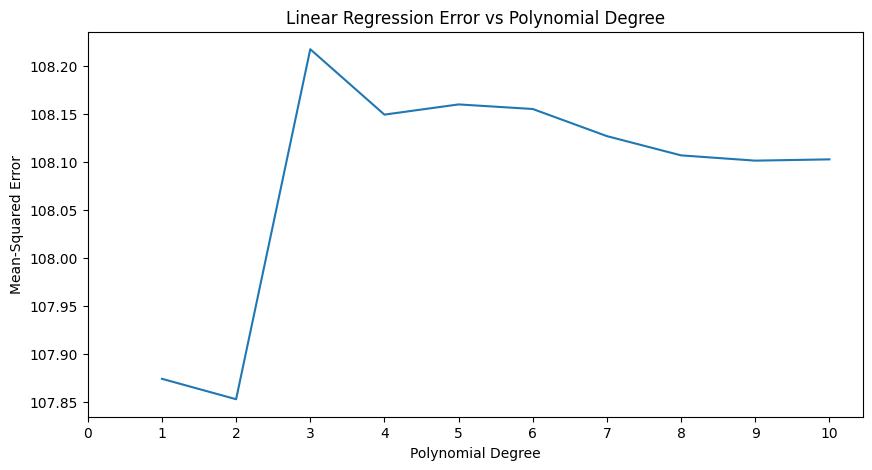

In [20]:
X_raw = df[["Price"]]
Y_raw = df[["Metacritic score"]]

max_degree = 10

X_train, X_test, Y_train, Y_test, models = try_models(X_raw, Y_raw, max_degree)

errors = [models[i]["Error"] for i in range(1, max_degree+1)]

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(range(1, max_degree+1), errors)
axes.set_title("Linear Regression Error vs Polynomial Degree")
axes.set_xlabel("Polynomial Degree")
axes.set_xticks(range(0, max_degree+1))
axes.set_ylabel("Mean-Squared Error")

Oh no! The error generated by these models doesn't seem to be consistent (you can run the cell more times to see this), so we can't really choose an optimal degree. Let's plot the data and a 1-degree regression line to see what's happening.

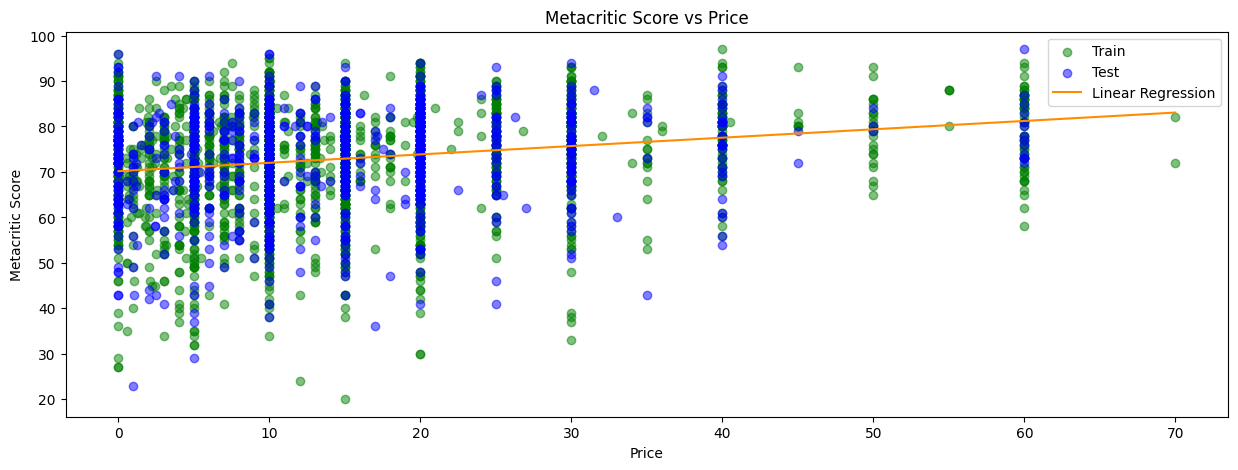

In [21]:
# Generate a dense grid for plotting
X_dense = np.linspace(X_train.min(), X_train.max(), 400).reshape(-1, 1)

# Predict on the dense grid for smooth plotting
Y_dense_pred = models[1]["Model"].predict(X_dense)

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.scatter(X_train, Y_train, color='green', label='Train', alpha=0.5)
axes.scatter(X_test, Y_test, color='blue', label='Test', alpha=0.5)
axes.plot(X_dense, Y_dense_pred, color='darkorange', label='Linear Regression')
axes.set_title('Metacritic Score vs Price')
axes.set_xlabel('Price')
axes.set_ylabel('Metacritic Score')
axes.legend()

We can somewhat see the problem here: prices tend to fall into $5 increments, leaving large regions sparsely populated. Can we come up with a better financial metric for our purposes?

## 3E. A better metric: Expected Revenue vs Metacritic Score

Let's try using a different metric for the independent variable of our regression model: revenue! We have an "Estimated owners" column signifying how many people have purchased the game, and we can multiply that by the game's price to get an estimate of how much money it earns. Such a metric may also be more useful for our purposes: it's easier to compare an operating budget against an expected revenue than with just a price. 

Let's start by investigating the "Estimated Owners" column.

In [22]:
pd.unique(df["Estimated owners"])

array(['20000 - 50000', '200000 - 500000', '100000 - 200000',
       '50000 - 100000', '500000 - 1000000', '2000000 - 5000000',
       '1000000 - 2000000', '0 - 20000', '20000000 - 50000000',
       '5000000 - 10000000', '0 - 0', '10000000 - 20000000',
       '50000000 - 100000000', '100000000 - 200000000'], dtype=object)

Let's get a preliminary visualization of the data:

Text(0, 0.5, 'Metacritic Score')

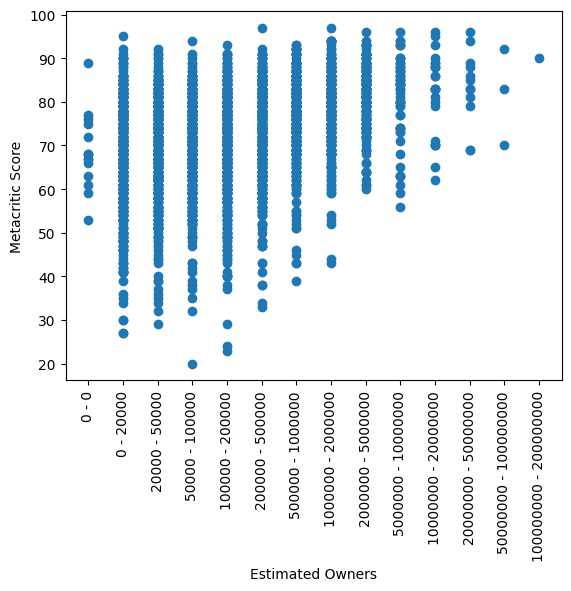

In [23]:
est_owners = ['0 - 0', '0 - 20000', '20000 - 50000', '50000 - 100000', '100000 - 200000','200000 - 500000', '500000 - 1000000', '1000000 - 2000000', '2000000 - 5000000', '5000000 - 10000000', '10000000 - 20000000', '20000000 - 50000000', '50000000 - 100000000', '100000000 - 200000000']
own_to_score = dict.fromkeys(est_owners)
for key in own_to_score.keys():
    own_to_score[key] = df["Metacritic score"][df["Estimated owners"] == key]

owners = []
o_scores = []

for key in own_to_score.keys():
    owners += [key for _ in range(len(own_to_score[key]))]
    o_scores += list(own_to_score[key])

plt.scatter(owners, o_scores)
plt.xticks(rotation=90)
plt.xlabel("Estimated Owners")
plt.ylabel("Metacritic Score")

We'll need to convert the estimated owner ranges to numbers, both to get a better picture of the data and to run linear regression. Let's choose the midpoint to represent each range:

{'0 - 0': 0, '0 - 20000': 10000, '20000 - 50000': 35000, '50000 - 100000': 75000, '100000 - 200000': 150000, '200000 - 500000': 350000, '500000 - 1000000': 750000, '1000000 - 2000000': 1500000, '2000000 - 5000000': 3500000, '5000000 - 10000000': 7500000, '10000000 - 20000000': 15000000, '20000000 - 50000000': 35000000, '50000000 - 100000000': 75000000, '100000000 - 200000000': 150000000}


Text(0, 0.5, 'Metacritic Score')

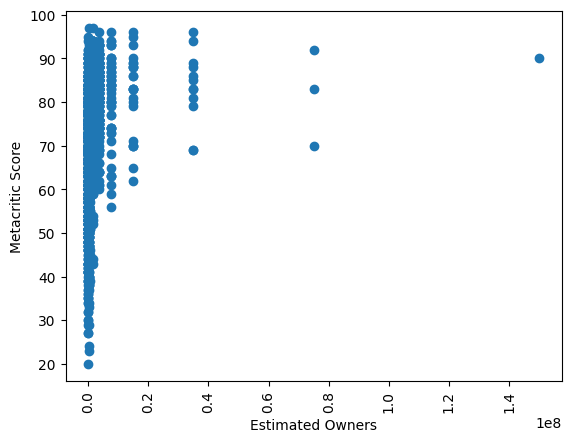

In [24]:
range2num = dict.fromkeys(est_owners)
for key in range2num.keys():
    min = int(key.split(" - ")[0])
    max = int(key.split(" - ")[1])
    range2num[key] = int(min + ((max - min)/2))
print(range2num)
df["Estimated owners"] = df["Estimated owners"].apply(lambda x: range2num[x])

plt.scatter(df["Estimated owners"], df["Metacritic score"])
plt.xticks(rotation=90)
plt.xlabel("Estimated Owners")
plt.ylabel("Metacritic Score")

The data is fairly sparse and, of course, victim to a similar problem to the price data. Let's see what happens when we multiply the estimated owners by price to create our "Estimated Revenue" metric.

Text(0, 0.5, 'Metacritic Score')

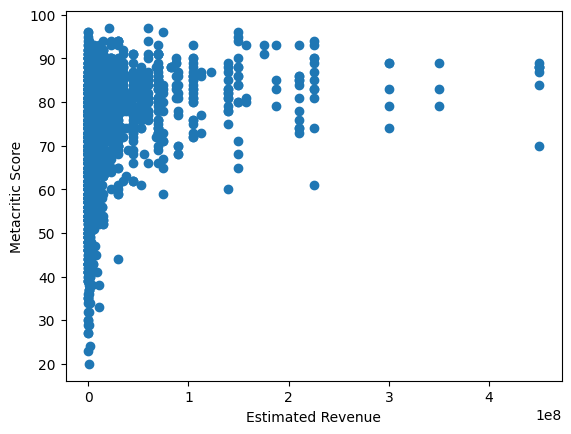

In [25]:
df["Estimated Revenue"] = df["Estimated owners"] * df["Price"]
df = df[df["Estimated Revenue"] < 0.5e9]
plt.scatter(df["Estimated Revenue"], df["Metacritic score"])
plt.xlabel("Estimated Revenue")
plt.ylabel("Metacritic Score")

It's not perfect, but the data is much more spread out!

Now let's see if Estimated Revenue is correlated to Metacritic score. Again, we calculate the Pearson coefficient.

In [26]:
er_ms_R = scst.pearsonr(df["Estimated Revenue"], df["Metacritic score"])
print(f"Pearson Coefficient: {er_ms_R.statistic}")
print(f"P-value: {er_ms_R.pvalue}")

Pearson Coefficient: 0.23556478640336434
P-value: 2.1000934350735363e-50


This is similar to the price data. We have a low p-value, indicating a correlation, and a value ~0.24, signifying a weak positive relationship.

Now that we have this new metric, let's use it to create a regression model.

As before, we train linear regression models of varying degree to find the optimal polynomial degree.

Text(0, 0.5, 'Mean-Squared Error')

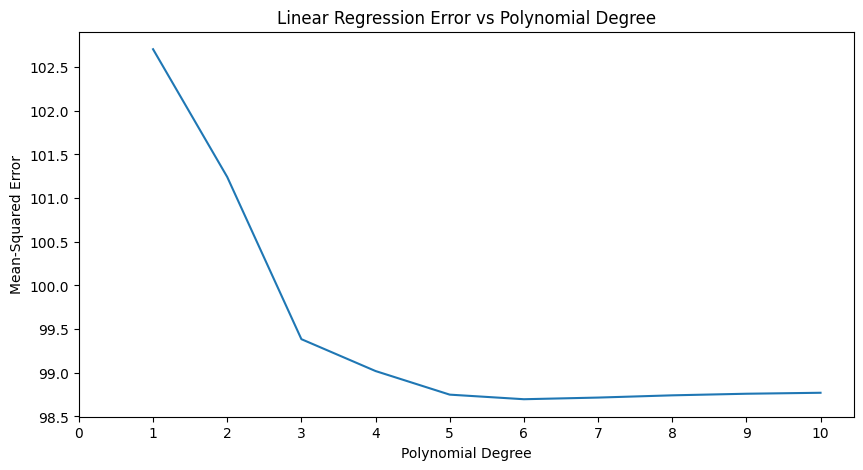

In [27]:
X_raw = df[["Estimated Revenue"]]
Y_raw = df[["Metacritic score"]]

max_degree = 10

X_train, X_test, Y_train, Y_test, models = try_models(X_raw, Y_raw, max_degree)

errors = [models[i]["Error"] for i in range(1, max_degree+1)]

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(range(1, max_degree+1), errors)
axes.set_title("Linear Regression Error vs Polynomial Degree")
axes.set_xlabel("Polynomial Degree")
axes.set_xticks(range(0, max_degree+1))
axes.set_ylabel("Mean-Squared Error")


Now, we consistently get 5 as our optimal polynomial degree. Let's plot this result!

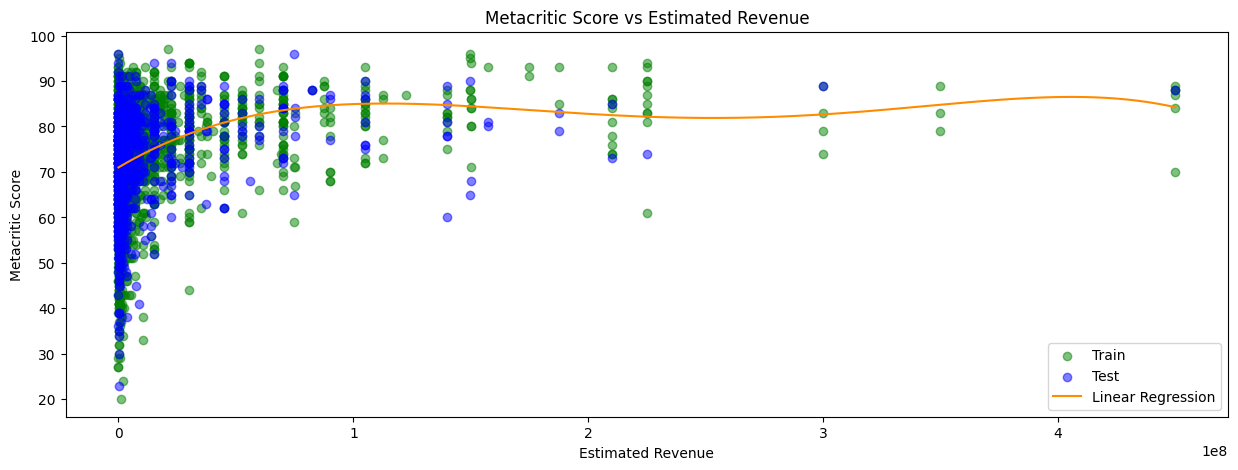

In [28]:
# Generate a dense grid for plotting purposes
X_dense = np.linspace(X_train.min(), X_train.max(), 400).reshape(-1, 1)

# Predict on the dense grid for smooth plotting
Y_dense_pred = (models[5]["Model"]).predict(X_dense)

# Formatting the plot
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.scatter(X_train, Y_train, color='green', label='Train', alpha=0.5)
axes.scatter(X_test, Y_test, color='blue', label='Test', alpha=0.5)
axes.plot(X_dense, Y_dense_pred, color='darkorange', label='Linear Regression')
axes.set_title('Metacritic Score vs Estimated Revenue')
axes.set_xlabel('Estimated Revenue')
axes.set_ylabel('Metacritic Score')
axes.legend()

And we have our model!

Let's try using it. Say our rock-and-roll game about Batman had a budget of 100 million USD and we wanted 30% profit, for a desired revenue of 130 million USD. Our model predicts such a game would get a Metacritic score of:

In [29]:
models[5]["Model"].predict([[130000000]])[0]

84.9135044341869

Not quite the best, but not bad either!

It should be noted that this model gets less representative as the revenue gets higher, due to lack of data. Once we pass the $200 million mark, we are extrapolating a great deal.

# Conclusion

We've learned that adding multiplayer to a game can help its review score slightly, that the price of a game is correlated with how it reviews, and we've made a model of a game's expected revenue and its Metacritic score. These could be useful tools in guiding a game's development.

Of course, all these relationships with review score are fairly weak, and they should be! Games are art, after all; the nuances of creating a good one would be hard to capture with data alone.